# 用沿海城市作为数据

     pcost       dcost       gap    pres   dres
 0:  8.7213e-03  2.8574e+00  2e+01  2e+00  4e+02
 1:  7.5023e-02 -1.9220e+00  3e+00  2e-01  7e+01
 2:  9.4590e-02  1.2538e-02  8e-02  4e-15  1e-13
 3:  4.6080e-02  4.0179e-02  6e-03  3e-15  1e-13
 4:  4.5120e-02  4.4213e-02  9e-04  5e-15  6e-14
 5:  4.4698e-02  4.4688e-02  1e-05  5e-15  7e-14
 6:  4.4694e-02  4.4694e-02  1e-07  2e-15  6e-14
 7:  4.4694e-02  4.4694e-02  1e-09  6e-15  5e-14
Optimal solution found.
w1: -0.298977  w2: 0.003147  b: 37.187254


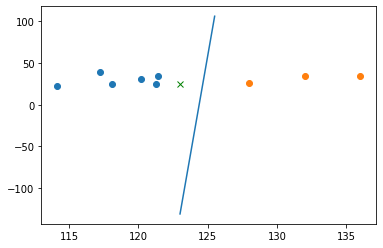

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pprint
import cvxopt
from cvxopt import matrix, solvers
def svm(X1,X2):
    n1 = len(X1)
    n2 = len(X2)
    P = matrix([[0.,0,0],[0,1,0],[0,1,0]])
    q = matrix([0.,0,0])
    one1 =np.ones((n1,1))
    W1 = np.hstack((one1,X1))
    one2 =np.ones((n2,1))
    W2 = -1*np.hstack((one2,X2))
    n = n1 + n2 
    G = -1*matrix(np.vstack((W1,W2)))
    h = -1*matrix(np.ones((n,1)))
    re = cvxopt.solvers.qp(P,q,G,h)
    return re['x']
###############################################
###############################################
ch0= np.array([
        [121.4,34.5],#上海
        [117.2,39.1],#天津
        [114.1,22.2],#香港
        [120.2,30.3],#杭州
        [118.1,24.5],#厦门
        [121.3,25.0] #台北
        ])
ch1 = np.array([
        [116.41667,39.91667],#北京
        [106.45000, 29.56667],#重庆
        [104.06667,30.66667],#成都
        [114.31667,30.51667]#武汉
        ])

jp0= np.array([
        [128, 26],#冲绳
        [132, 34],#广岛
        [136, 35],#桑明
        ])
jp1 = np.array([
        [135.3,34.4],   #大阪
        [132.27,34.24], #广岛
        [135.5,34.41], #奈良
        [139.46,35.42], #东京
        ])

###################################
plt.scatter(ch0[:,0],ch0[:,1])
plt.scatter(jp0[:,0],jp0[:,1])
plt.plot(123,25,color='g',marker='x')
#####################################
re = svm(ch0,jp0) 
b = re[0]
w1 = re[1]
w2 = re[2]
print('w1:',round(w1,6),' w2:',round(w2,6),' b:',round(b,6))
xx = np.linspace(123,125.5)
zz = -w1/w2*xx - b/w2
plt.plot(xx, zz)


# 加入内地城市

     pcost       dcost       gap    pres   dres
 0:  3.5565e-03  9.8680e+00  5e+01  2e+00  4e+02
 1:  3.2236e-02 -8.0922e+00  1e+01  5e-01  1e+02
 2:  6.2477e-02 -1.4269e+00  2e+00  6e-02  1e+01
 3:  6.4954e-02  2.0968e-02  4e-02  3e-04  8e-02
 4:  4.6344e-02  4.1763e-02  5e-03  3e-05  7e-03
 5:  4.4711e-02  4.4657e-02  5e-05  3e-07  8e-05
 6:  4.4694e-02  4.4693e-02  5e-07  3e-09  8e-07
 7:  4.4694e-02  4.4694e-02  5e-09  3e-11  8e-09
Optimal solution found.
w1: -0.298977  w2: 0.003147  b: 37.187255


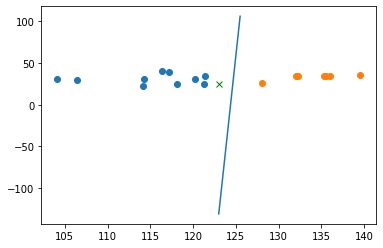

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pprint
import cvxopt
from cvxopt import matrix, solvers
def svm(X1,X2):
    n1 = len(X1)
    n2 = len(X2)
    P = matrix([[0.,0,0],[0,1,0],[0,1,0]])
    q = matrix([0.,0,0])
    one1 =np.ones((n1,1))
    W1 = np.hstack((one1,X1))
    one2 =np.ones((n2,1))
    W2 = -1*np.hstack((one2,X2))
    n = n1 + n2 
    G = -1*matrix(np.vstack((W1,W2)))
    h = -1*matrix(np.ones((n,1)))
    re = cvxopt.solvers.qp(P,q,G,h)
    return re['x']
###############################################
###############################################
ch0= np.array([
        [121.4,34.5],#上海
        [117.2,39.1],#天津
        [114.1,22.2],#香港
        [120.2,30.3],#杭州
        [118.1,24.5],#厦门
        [121.3,25.0] #台北
        ])
ch1 = np.array([
        [116.41667,39.91667],#北京
        [106.45000, 29.56667],#重庆
        [104.06667,30.66667],#成都
        [114.31667,30.51667]#武汉
        ])

jp0= np.array([
        [128, 26],#冲绳
        [132, 34],#广岛
        [136, 35],#桑明
        ])
jp1 = np.array([
        [135.3,34.4],   #大阪
        [132.27,34.24], #广岛
        [135.5,34.41], #奈良
        [139.46,35.42], #东京
        ])
ch=np.concatenate((ch0, ch1), axis=0)
jp=np.concatenate((jp0, jp1), axis=0)
###################################
plt.scatter(ch[:,0],ch[:,1])
plt.scatter(jp[:,0],jp[:,1])
plt.plot(123,25,color='g',marker='x')
#####################################
re = svm(ch,jp) 
b = re[0]
w1 = re[1]
w2 = re[2]
print('w1:',round(w1,6),' w2:',round(w2,6),' b:',round(b,6))
xx = np.linspace(123,125.5)
zz = -w1/w2*xx - b/w2
plt.plot(xx, zz)
